In [1]:
import importlib #check and manage package imports
import os #interact with os/ check for file
import warnings #to control warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('default')
warnings.filterwarnings('ignore')

def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"(library_name) is already installed.")
    except ImportError:
        print (f"(library_name) is now installed...")
        try:
            import pip
            pip.main(['install',library_name])
        except:
            print("error:failed to install.")


if 'sentiment140' not in os.listdir():
    check_and_install_library('opendatasets')
    import opendatasets as od
    dataset_url='https://www.kaggle.com/datasets/kazanova/sentiment140'
    od.download(dataset_url)
#{"username":"chinmayadas1729","key":"217ce5534a06eb0b53283e38591c4749"}





(library_name) is now installed...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting opendatasets

Downloading opendatasets-0.1.22-py3-none-any.whl (15 kB)

Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from opendatasets) (4.66.1)

Requirement already satisfied: kaggle in /usr/local/lib/python3.10/dist-packages (from opendatasets) (1.5.16)

Requirement already satisfied: click in /usr/local/lib/python3.10/dist-packages (from opendatasets) (8.1.7)

Requirement already satisfied: six>=1.10 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (1.16.0)

Requirement already satisfied: certifi in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2023.7.22)

Requirement already satisfied: python-dateutil in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.8.2)

Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.31.0)

Requirement already satisfied: python-slugify in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (8.0.1)

Requirement already satisfied: urllib3 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.0.4)

Requirement already satisfied: bleach in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (6.0.0)

Requirement already satisfied: webencodings in /usr/local/lib/python3.10/dist-packages (from bleach->kaggle->opendatasets) (0.5.1)

Requirement already satisfied: text-unidecode>=1.3 in /usr/local/lib/python3.10/dist-packages (from python-slugify->kaggle->opendatasets) (1.3)

Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.2.0)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.4)

Installing collected packages: opendatasets

Successfully installed opendatasets-0.1.22

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chinmayadas1729
Your Kaggle Key: ··········


100%|██████████| 80.9M/80.9M [00:00<00:00, 129MB/s]


SELECTING RANGE FOR TWEETS

In [ ]:
features_name =['target','ids','date','flag','user','text']
data= pd.read_csv('sentiment140/training.1600000.processed.noemoticon.csv',names=features_name,encoding='ISO-8859-1')

#checkout top 5 rows
data.head()

In [3]:
#print concise summary about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
#check for missing values
data.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [5]:
#check for duplicate records
data[data.duplicated()].shape[0]
#data[] retrieves data from dataframe based on condition
#shape - returns dim as tuple-row,col
#shape[0]- retrieves no.of rows of dataframe

0

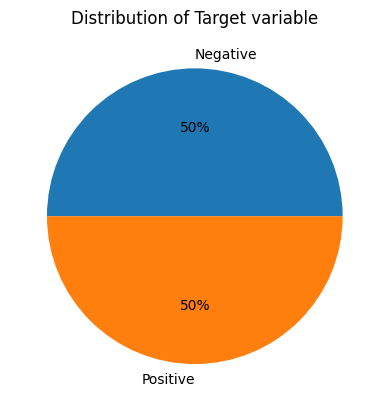

In [6]:
#check the distribution of target variable
plt.pie(data['target'].value_counts(),autopct='%2.f%%',labels=['Negative','Positive'])
plt.title('Distribution of Target variable')
plt.show()
#autopct='%2.f%%- formats and displays percentage of each slice


In [37]:
#check the distribution of flag feature:
#data['flag'].value_counts()

KeyError: ignored

In [8]:
#we require only tweet text and target feature
#so we are taking only these two features
data=data[['text','target']]

In [9]:
#checkout top 5 tweets
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


Data Manipulation

In [10]:
data['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

Description about Target variable : 0 == negative and 4 == positive

In [11]:
#replacing 4 with 1 for convenience
data['target']=data['target'].replace(4,1)

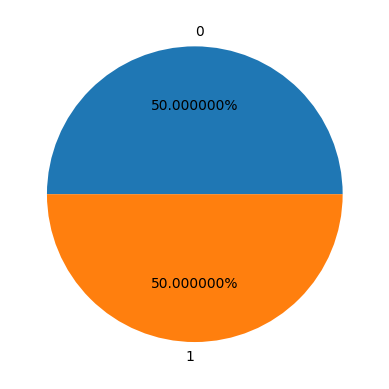

In [12]:
#Visualise and distribution of modified 'target' column
target_counts=data['target'].value_counts()
plt.pie(target_counts.values,autopct='%2f%%',labels=target_counts.index)
plt.show()

In [ ]:
#out dataset is massive so lets take total 40k samples for sentiments ( for each each class 20k samples )
negative_tweets=data[data['target']==0].sample(20000)
positive_tweets=data[data['target']==1].sample(20000)

#combining both samples
sentiments=pd.concat([negative_tweets,positive_tweets],ignore_index=True) #ignore_index=True ensures the new DataFrame has a continuous index
sentiments.rename(columns={'text':'tweet'},inplace=True) #renaming 'text' column to 'tweet'

#convert all the tweet text into lower case
sentiments['tweet']=sentiments['tweet'].str.lower()

#as we can see all the tweets are convert into lower case
sentiments.head(5)



In [14]:
#TEXT PROCESSING WITH NLTK LIBRARY

import nltk
#download stopwords and punctuation
nltk.download('stopwords')
nltk.download('punkt') #Punkt tokenizer models for unsupervised ML tokenization

#list of english language stopwords from the nltk corpus
#storing in a set for lookup operations is effecient than a list
from nltk.corpus import stopwords
english_stopwords=stopwords.words('english')
STOPWORDS=set(english_stopwords)

#clean/remove stopwords from the tweets
def clean_stopwords(text):
  value=' '.join(word for word in text.split() if word not in STOPWORDS)
  return value

#apply clean_stopwords function on tweet to remove the stopwords.
sentiments['tweet']=sentiments['tweet'].apply(lambda x: clean_stopwords(x))

#cleaning and removing punctuations
import string #get punctuation characters
english_punctuations=string.punctuation
print(english_punctuations)

punctuation_list=english_punctuations

def cleaning_punctuations(text):
    translator=str.maketrans('', '',punctuation_list) #str.maketrans-returns translation table
    return text.translate(translator)

sentiments["tweet"]=sentiments["tweet"].apply(lambda text: cleaning_punctuations(text))

#check top 10 tweets after stopwords and punctuation removal to make sure we have successfully cleaned the tweet
sentiments.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,tweet,target
0,sighlance bogus,0
1,perki dont 1jh kerrysholicar s sister tho,0
2,chuckshurley sigh were going miss you chuck,0
3,shares h1n1 possible symptomscases confirmed h...,0
4,kleinmeli im sorry that really try make sure c...,0
5,dropped wrong sodding database,0
6,mslisanguyen thanks wish coming out,0
7,dun knw tvb series watch now threshold persona...,0
8,nuggets gave long time ago,0
9,im feeling little know why,0


In [15]:
sentiments.shape #rows,col

(40000, 2)

In [16]:
import re #regex for matching, filtering operations
#cleaning and removing repeated charecters:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+',r'1',text) #r'(.)\1+' matches char. and its repetitions
    #re.sub replaces matched pattern with specified replacement

sentiments["tweet"]=sentiments["tweet"].apply(lambda text: cleaning_repeating_char(text))
sentiments.head()

,tweet,target
0,sighlance bogus,0
1,perki dont1jh kerrysholicar s sister tho,0
2,chuckshurley sigh were going miss you chuck,0
3,shares 11 possible symptomscases confirmed hp ...,0
4,kleinmeli im sorry that really try make sure c...,0


In [17]:
#cleaning removing URL from tweet
def cleaning_url(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)
    #matches url starting with www or http or https

sentiments["tweet"]=sentiments["tweet"].apply(lambda text: cleaning_url(text))
sentiments.head()

#clearning and removing numeric numbers
def cleaning_numbers(text):
    return re.sub('[0-9]+', '',text)

sentiments["tweet"]=sentiments["tweet"].apply(lambda text: cleaning_numbers(text))
sentiments.head()

,tweet,target
0,sighlance bogus,0
1,perki dontjh kerrysholicar s sister tho,0
2,chuckshurley sigh were going miss you chuck,0
3,shares possible symptomscases confirmed hp or...,0
4,kleinmeli im sorry that really try make sure c...,0


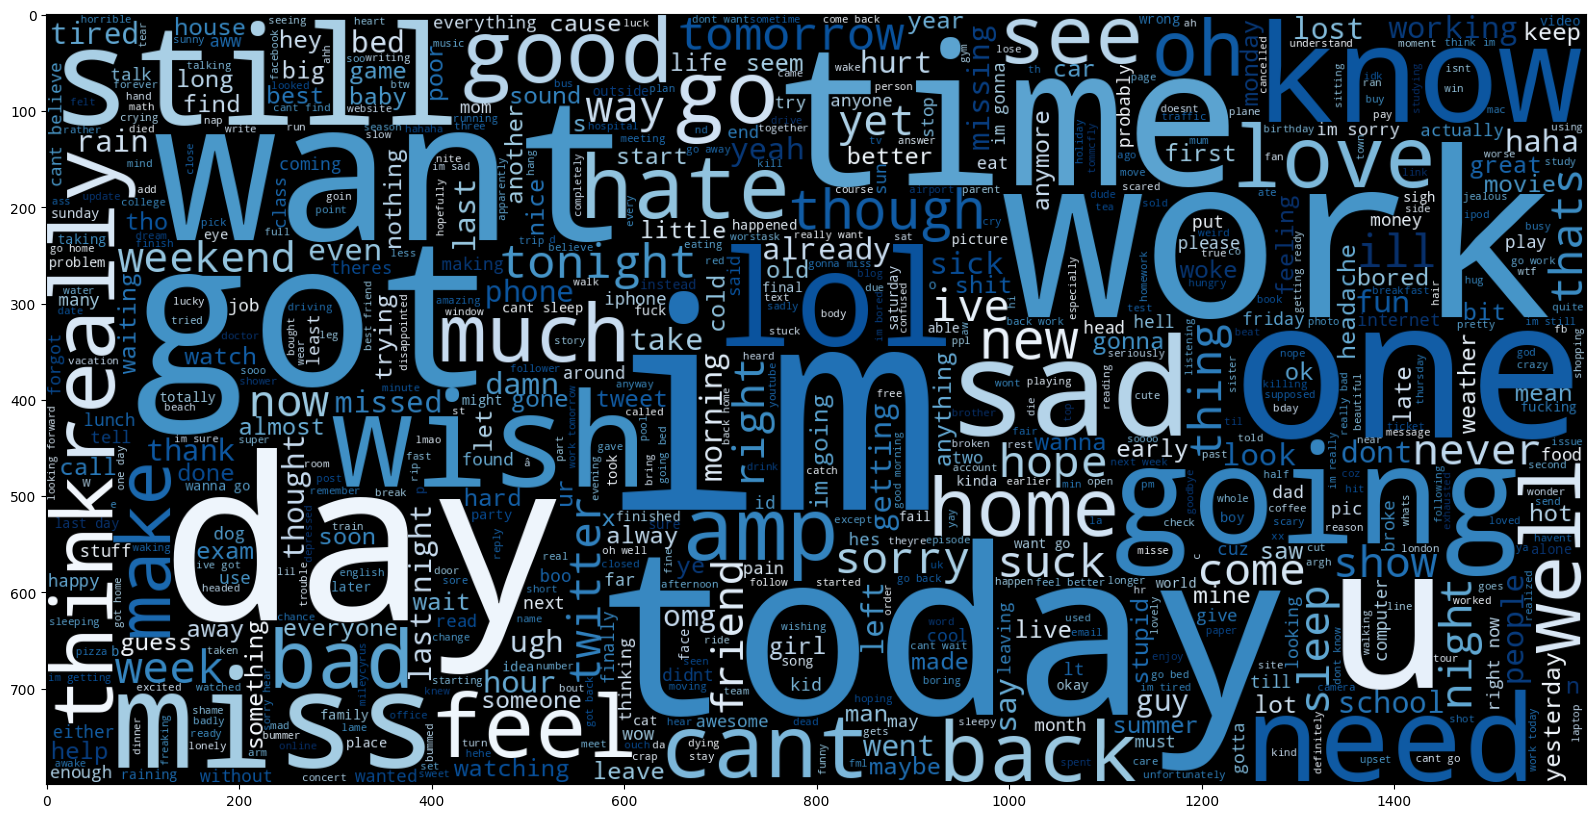

In [21]:
#plot cloud of words for negative class
negative_tweets=sentiments[sentiments["target"]==0]["tweet"]
plt.figure(figsize=(20,10))
from wordcloud import WordCloud

wc= WordCloud(max_words=1000, min_font_size=10, height=800, width=1600, background_color='black', colormap='Blues').generate(' '.join(np.array(negative_tweets)))
plt.imshow(wc)
plt.show()

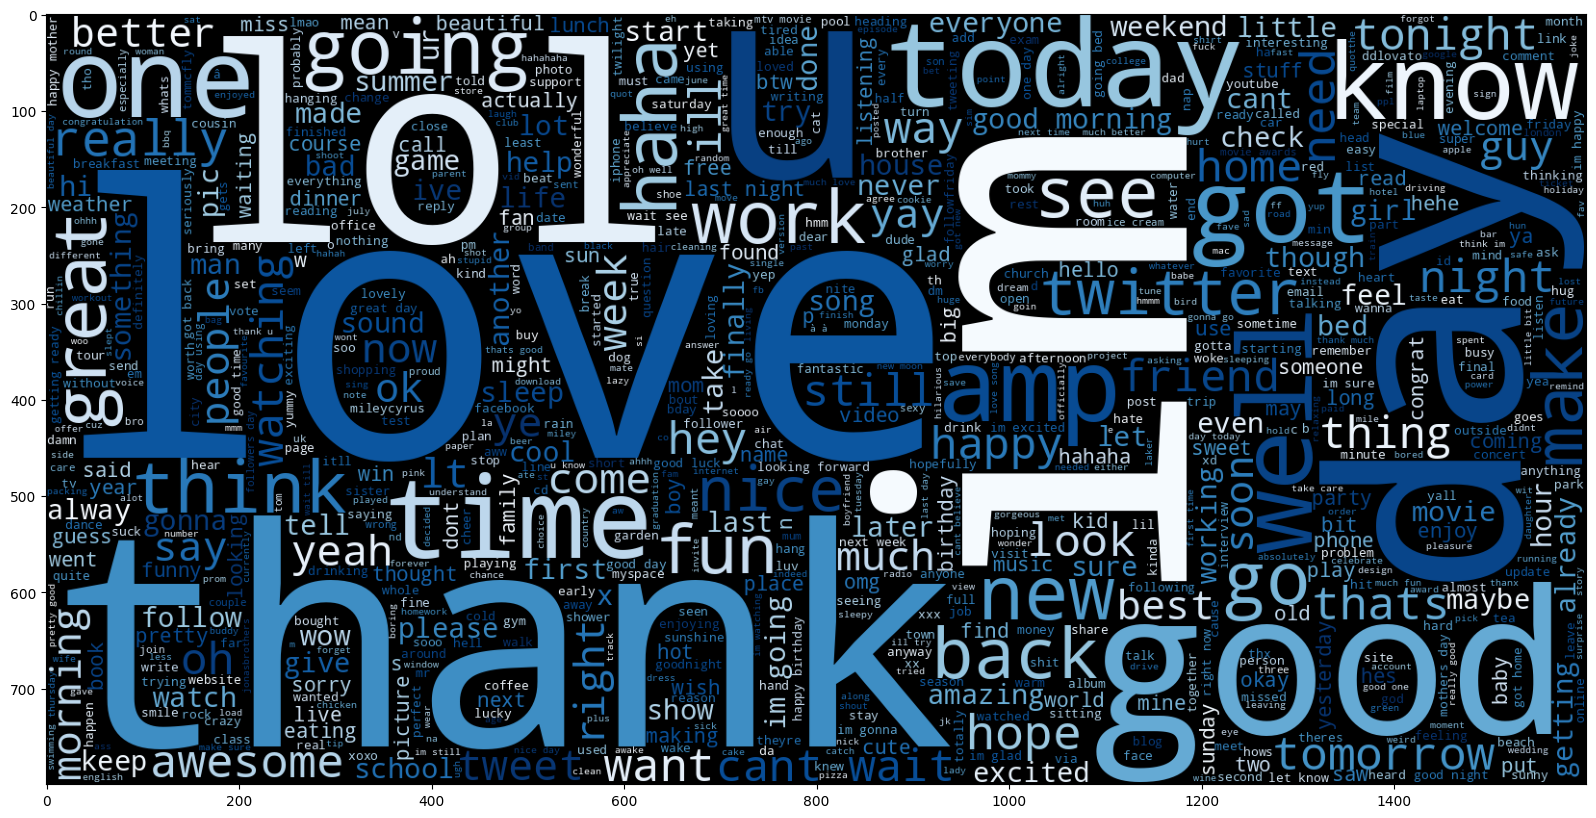

In [23]:
#plot cloud of words for positive class
positive_tweets=sentiments[sentiments["target"]==1]["tweet"]
plt.figure(figsize=(20,10))

wc= WordCloud(max_words=1000, min_font_size=10, height=800, width=1600, background_color='black', colormap='Blues').generate(' '.join(np.array(positive_tweets)))
plt.imshow(wc)
plt.show()

In [24]:
sentiments.head()

,tweet,target
0,sighlance bogus,0
1,perki dontjh kerrysholicar s sister tho,0
2,chuckshurley sigh were going miss you chuck,0
3,shares possible symptomscases confirmed hp or...,0
4,kleinmeli im sorry that really try make sure c...,0


In [25]:
#word tokenization of tweet
from nltk.tokenize import word_tokenize
sentiments["tweet"]=sentiments["tweet"].apply(word_tokenize)
sentiments.head()

,tweet,target
0,"[sighlance, bogus]",0
1,"[perki, dontjh, kerrysholicar, s, sister, tho]",0
2,"[chuckshurley, sigh, were, going, miss, you, c...",0
3,"[shares, possible, symptomscases, confirmed, h...",0
4,"[kleinmeli, im, sorry, that, really, try, make...",0


In [26]:
#apply lemmatizer on sentiments.
#converts words to base form
nltk.download('wordnet')
lm=nltk.WordNetLemmatizer()
#WordNet Lemmatizer from NLTK requires the WordNet lexical database

def lemmatizer_on_word(text):
    data=[lm.lemmatize(word) for word in text]
    return data

sentiments["tweet"]=sentiments["tweet"].apply(lambda text:lemmatizer_on_word(text))
sentiments.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,tweet,target
0,"[sighlance, bogus]",0
1,"[perki, dontjh, kerrysholicar, s, sister, tho]",0
2,"[chuckshurley, sigh, were, going, miss, you, c...",0
3,"[share, possible, symptomscases, confirmed, hp...",0
4,"[kleinmeli, im, sorry, that, really, try, make...",0


In [27]:
#remove commma and convert tokens into string before fitting to the model (it's depends on model to model)
sentiments["tweet"]=[" ".join(line)for line in sentiments["tweet"]]

In [28]:
sentiments.head(2)

,tweet,target
0,sighlance bogus,0
1,perki dontjh kerrysholicar s sister tho,0


In [29]:
#spliting data into train and test subsets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sentiments["tweet"],sentiments["target"],test_size=0.2,random_state=43)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32000,), (8000,), (32000,), (8000,))

LINEAR REGRESSION

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer #converts raw text into a matrix of TF-IDF
from sklearn.linear_model import LogisticRegression

#LR Pipeline
lr_model = Pipeline([
                    ("tfidf", TfidfVectorizer()), # transform the raw text data into a matrix of TF-IDF features.
                    ("logistic", LogisticRegression(C=1,solver='lbfgs',max_iter=100)) # take the output from the previous step as input and train on it
])

#C: Inverse regularization strength. Smaller values specify stronger regularization.
#solver: Algorithm to use in the optimization problem. 'lbfgs' is an optimizer in the family of quasi-Newton methods.
#max_iter: Maximum number of iterations for the solver to converge.

lr_model.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logistic', LogisticRegression(C=1))])

TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features. It's a combination of CountVectorizer (which transforms texts into a matrix of token counts) and TfidfTransformer (which transforms a count matrix into a normalized tf or tf-idf representation).

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
#function to make prediction and evaluate the performance of the model.
def predict_and_evaluate_model_performance(model,test_data):
    y_pred=model.predict(test_data)
    print("Training Score : ",model.score(x_train,y_train))
    print("validation Score : ",accuracy_score(y_test,y_pred))
    print("Precision Score : ",precision_score(y_test,y_pred))
    print("Recall Score : ",recall_score(y_test,y_pred))
    print("F1 Score : ",f1_score(y_test,y_pred))
    print("="*100)
    print("Classification Report : ",classification_report(y_test,y_pred))
    print("="*100)
    cm=confusion_matrix(y_test,y_pred)
    print(cm)

In [32]:
#this method takes model and test data as an argument.
predict_and_evaluate_model_performance(lr_model,x_test)

Training Score :  0.8515
validation Score :  0.75575
Precision Score :  0.7480563654033042
Recall Score :  0.7705205205205206
F1 Score :  0.7591222879684417
Classification Report :                precision    recall  f1-score   support

           0       0.76      0.74      0.75      4004
           1       0.75      0.77      0.76      3996

    accuracy                           0.76      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.76      0.76      0.76      8000

[[2967 1037]
 [ 917 3079]]


In [33]:
#Naive Bayes Pipeline
#BernoulliNB implements the naive Bayes training and classification algo. for data
#that is distributed according to multivariate Bernoulli distributions

from sklearn.naive_bayes import BernoulliNB
nb_model=Pipeline([
        ("tfidf",TfidfVectorizer()), # Convert words to numbers using tfidf
        ("bernominal",BernoulliNB()) # Model the text using Bernoulli Naive Bayes
])

nb_model.fit(x_train,y_train) #training the model

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('bernominal', BernoulliNB())])

In [34]:
#this method takes model and test data as an argument.
predict_and_evaluate_model_performance(nb_model,x_test)

Training Score :  0.8959375
validation Score :  0.747125
Precision Score :  0.7591279222484896
Recall Score :  0.7232232232232232
F1 Score :  0.7407407407407407
Classification Report :                precision    recall  f1-score   support

           0       0.74      0.77      0.75      4004
           1       0.76      0.72      0.74      3996

    accuracy                           0.75      8000
   macro avg       0.75      0.75      0.75      8000
weighted avg       0.75      0.75      0.75      8000

[[3087  917]
 [1106 2890]]


In [35]:
# XGBoost Classifier Pipeline
#implementation of gradient boosted decision trees designed for speed and performance

from xgboost import XGBClassifier
xg_model=Pipeline([
        ("tfidf",TfidfVectorizer()), # Convert words to numbers using tfidf
        ("xgboost",XGBClassifier()) # Model the text using XGBoost Classifier
])
xg_model.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [36]:
#this method takes model and test data as an argument.
predict_and_evaluate_model_performance(xg_model,x_test)

Training Score :  0.77225
validation Score :  0.722875
Precision Score :  0.692075145756856
Recall Score :  0.8020520520520521
F1 Score :  0.7430161122058653
Classification Report :                precision    recall  f1-score   support

           0       0.77      0.64      0.70      4004
           1       0.69      0.80      0.74      3996

    accuracy                           0.72      8000
   macro avg       0.73      0.72      0.72      8000
weighted avg       0.73      0.72      0.72      8000

[[2578 1426]
 [ 791 3205]]
